<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/Simulacion-I/blob/main/prueba_frecuencias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRUEBA DE FRECUENCIAS

##SIMULACIÓN

**Estudiante:** Karla Michelle Soriano Sánchez

**Objetivo**: Elaborar un código en Python que implemente la Prueba de Frecuencias para evaluar si un conjutno de números pseudoaleatorios sigue una distribución uniforme en el intervalo (0,1)

##Fundamento teorico

La prueba de frecuencias fromad parte de las prueba de bondad de ajustes y se utiliza para verificar si un conjunto de datos (muestra) sigue una distribución uniforme $U(0,1)$.
La idea principal:
1.  dividir el intervalo (0,1) en k clases iguales
2. contar cuántos valores caen en cada clase, es decir calculare la frecuencia observada.
3.  comparar con la
frecuencia esperada si la muestra fuera uniforme.


Definiremos la prueba de hipotesis de la siguiente manera:

- *Hipotesis nula*
$H_0$: Los datos (muestra) provienen de una distribución uniforme $U(0,1)$

- *Hipotesis alternativa*  $H_1$: Los datos (muestra) NO provienen de una distribución uniforme $U(0,1)$




Se dividio el intervalo $(0,1)$ en $k$ clases de igual amplitud. Para este ejercicio se eligio:

$$k=5$$

La frecuencia esparada en cada intervalo está dada por:

$$FE= \frac{n}{k}$$

donde:
- $n$ es el número total de datos,
- $k$ es el número de subintervalos


Por otro lado el estadisitco de prueba es:


$$
\chi^2 = \sum_{i=1}^{k} \frac{(FO_i - FE)^2}{FE}
$$

donde:
- $FO_i$ es la frecuencia observada en el intervalo $i$
- $FE$ es la frecuencia esperada.



De modo que la decisión se toma comparando $\chi^2_{calculado}$ con el valor crítico
$\chi^2_{\alpha, k-1}$.

El estadisitco de prueba es:



In [202]:
import numpy as np             #utilizada para manejo de arreglos y cálculos númericos
from scipy.stats import chi2   #utilizada para calcular el valor critico
import pandas as pd            #organiza los reultados en una tabla
from tabulate import tabulate  #da formato visual a la tabla
import matplotlib.pyplot as plt #graficar el histograma

In [203]:
#son los datos proporcionados en la imagen

data = [
0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
0.79882, 0.45679, 0.21631, 0.87616, 0.55743,
0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
0.58244, 0.85853, 0.86752, 0.38729, 0.15506,
0.23949, 0.53559, 0.33381, 0.49883, 0.75103,
0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]

n=len(data)
print(f"El número total de datos es: {n}")

El número total de datos es: 100


In [204]:
def prueba_frecuencias (datos,fe, alpha):
    # defino manualmente los límites de la clase
    bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

    #clasifico cada dato dentro del intervalo correspondiente
    indices = np.digitize(datos, bins, right=False)

    # cuento cuántos datos caen en cada intervalo
    conteos = [(indices ==i).sum() for i in range (1, len(bins))]

    # número de intervalos
    k =len(conteos)

    # Frecuencia esperada
    fe = n / k

    # cálculo el estadisitico parcial de cada clase
    chi_parcial = [(fo - fe)**2 / fe for fo in conteos]

    # calculo el estadisitico toal Chi- cuadrada
    chi_calculado = sum(chi_parcial)

    # definir el grado de libertad
    gl = k - 1

    # calculo el valor critico de la distribución Chi- cuadrada
    chi_critico = chi2.ppf(1 - alpha, gl)

    #construir la tabla para mostrar los resultados
    tabla =[]

    intervalos_texto = ["[0, 0.2)",
                        "[0.2, 0.4)",
                        "[0.4, 0.6)",
                        "[0.6, 0.8)",
                        "[0.8, 1.0]"]

    for i in range (k):
      fila = [intervalos_texto[i],
              conteos[i], fe,
              round (chi_parcial[i], 4)]
      tabla.append(fila)

    #imprimir tabla
    print (tabulate(tabla, headers=["Intervalo","Frec. Observada",
                              "Frec. Esperada","(fo-fe)^2/fe"],
                    tablefmt="fancy_grid"))


    print("\nChi-cuadrada calculado:", round(chi_calculado,4))
    print("Chi-cuadrada critico", round(chi_critico,4))

    if chi_calculado < chi_critico:
      print("\nNo se rechaza H0: Los datos provienen de una distribución uniforme U(0,1)")
    else:
      print("\nSe rechaza H0: Los datos NO provienen de una distribución uniforme U(0,1)")



In [205]:
alpha=0.05
n=len(data)
k=5

#frecuencia esperada
fe =n/k

prueba_frecuencias(data, fe, alpha)

╒═════════════╤═══════════════════╤══════════════════╤════════════════╕
│ Intervalo   │   Frec. Observada │   Frec. Esperada │   (fo-fe)^2/fe │
╞═════════════╪═══════════════════╪══════════════════╪════════════════╡
│ [0, 0.2)    │                21 │               20 │           0.05 │
├─────────────┼───────────────────┼──────────────────┼────────────────┤
│ [0.2, 0.4)  │                22 │               20 │           0.2  │
├─────────────┼───────────────────┼──────────────────┼────────────────┤
│ [0.4, 0.6)  │                19 │               20 │           0.05 │
├─────────────┼───────────────────┼──────────────────┼────────────────┤
│ [0.6, 0.8)  │                23 │               20 │           0.45 │
├─────────────┼───────────────────┼──────────────────┼────────────────┤
│ [0.8, 1.0]  │                15 │               20 │           1.25 │
╘═════════════╧═══════════════════╧══════════════════╧════════════════╛

Chi-cuadrada calculado: 2.0
Chi-cuadrada critico 9.4877

No se 

Se observa que las frecuencias se mantienen relativamente cercanas a la frecuencia esparada en cada intervalo.

De tal manera que el valor de $\chi^2_{calculado}$ es menor que el valor critico $\chi^2_{calculado}$, es por eso que no se rechaza la hipotesis nula.

Por lo tanto podemos afirmar que el conujunto de números proviene de una distribución uniforme.

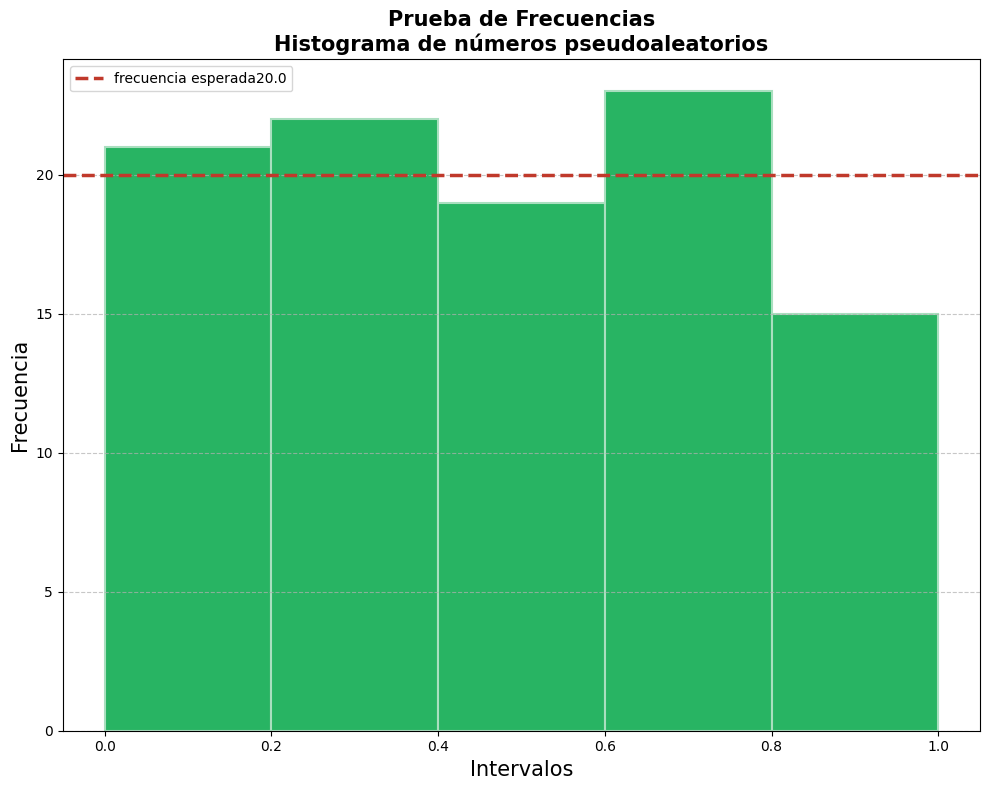

In [206]:
from matplotlib.lines import lineStyles
bins = [0,0.2,0.4,0.6,0.8,1.0]

plt.figure(figsize=(10,8))
#histograma
plt.hist(data, bins=bins,color="#28B463",edgecolor="#A9DFBF",linewidth=1.5)

#linea de frecuencia esperada
fe = len(data)/5
plt.axhline (fe, color="#C0392B", linestyle="--", linewidth=2.5, label=f"frecuencia esperada{fe}")


plt.title("Prueba de Frecuencias\nHistograma de números pseudoaleatorios",
          fontsize=15,
          fontweight="bold")

plt.xlabel("Intervalos", fontsize=15)
plt.ylabel("Frecuencia", fontsize=15)

plt.xticks(bins)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.legend()
plt.tight_layout()

plt.show()

Se observa que las frecuencias en cada intervalo son equilibradas y se mantienen cerca de la frecuencia esperada (linea roja).
Lo cual coincide graficamente con el resultado númerico en la prueba χ².